# Test of unknown file addition
* 20200811
* D. Windover


* Copying over all of your initializations...


In [9]:
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
import gaussian
import bruker_io as brio
import spectrum_evaluation as se
import hyperspy.api as hs

* adding the file to the base M4_measurements directory on my git...

In [33]:
directory = r'./M4_measurements/'
filename = '20200807_unknown_1.spx'

* adding in some possible elements...

In [34]:
elements = ['Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ti', 'Fe', 'Sr', 'Zr', 'Rh']

* reading the file into HyperSpy

In [36]:
unknown_directory = os.path.join(directory, filename)
unknown = brio.FittingData(unknown_directory)
brio.bruker_spx_import(unknown)

SPXFile:  ./M4_measurements/20200807_unknown_1.spx


* running a quick plot

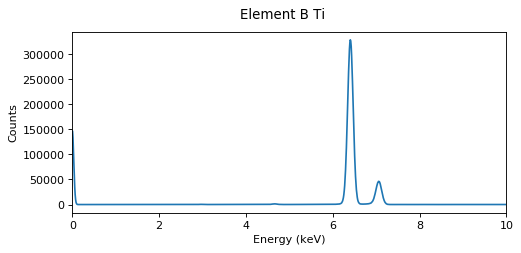

In [37]:
fig = plt.figure(num=None, figsize=(7, 3), dpi=80, facecolor='w', edgecolor='k')
plt.plot(unknown.energy_scale, unknown.channels)
fig.suptitle('Element B Ti')
plt.xlabel('Energy (keV)')
plt.ylabel('Counts')
plt.xlim(0, 10)
plt.show()

* initialize ad EDSSEMSpectrum class with the data we imported
* spoiler alert, the element might be obvious from the plot...

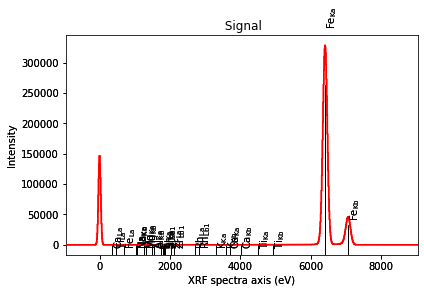

In [42]:
unknown_XRF = hs.signals.EDSSEMSpectrum(unknown.channels)
unknown_XRF.set_microscope_parameters(50000)
unknown_XRF.axes_manager[0].name = 'XRF spectra'
unknown_XRF.axes_manager[0].offset = Ti.calibration_abs
unknown_XRF.axes_manager[0].scale = Ti.calibration_lin
unknown_XRF.axes_manager[0].units = 'eV'
unknown_XRF.add_elements(elements)
unknown_XRF.crop_signal1D(0, 1000)
unknown_XRF.plot(True)

* want another one or two to play with??